# 分类算法与回归算法


## 分类算法

### P1: Distance

在 scikit-learn 中有如下 Distance：

- 向量空间实数值 real-valued vector space
    - 欧几里得距离 Euclidean distance $\sqrt{\sum(\vec x-\vec y)^2}$
    - 曼哈顿距离 Manhattan distance $\sum |\vec x-\vec y|$
    - 切比雪夫距离 Chebyshev distance $\max(|\vec x-\vec y|)$
    - 闵可夫斯基距离 Minkowski distance $\sum(|\vec x-\vec y|^{p})^{\frac{1}{p}}$
    - W闵可夫斯基距离 WMinkowski distance $\sum(|w(\vec x-\vec y)|^{p})^{\frac{1}{p}}$
    - S欧几里得距离 Seuclidean distance $\sqrt{\frac{\sum(\vec x-\vec y)^2}{V}}$
    - 马哈拉诺比斯距离 Mahalanobis distance $\sqrt{(\vec x-\vec y)'V^{-1}(\vec x-\vec y)}$
- 向量空间二维 two-dimensional vector space
    - 半正失距离 Haversine distance
- 向量空间整数值 integer-valued vector space
    - 海明距离 Hamming distance
    - 堪培拉距离 Canberra distance
    - 布雷柯蒂斯距离 Bray Curtis Distance

In [3]:
import numpy as np
from sklearn.neighbors import DistanceMetric

In [18]:
X = np.arange(6).reshape((2, 3))
print(f'vector a is {X[0, :]}')
print(f'vector b is {X[1, :]}')

dist_name = ['euclidean', 'manhattan', 'chebyshev']
for d in dist_name:
    dist = DistanceMetric.get_metric(d)
    print(f'distance name is {d}, distance value is \n {dist.pairwise(X)}')

vector a is [0 1 2]
vector b is [3 4 5]
distance name is euclidean, distance value is 
 [[0.         5.19615242]
 [5.19615242 0.        ]]
distance name is manhattan, distance value is 
 [[0. 9.]
 [9. 0.]]
distance name is chebyshev, distance value is 
 [[0. 3.]
 [3. 0.]]


上述结果中的说明（下列中数字表示的是数组索引）：

- [0, 0]: 向量 a 与向量 a 的距离
- [0, 1]: 向量 a 与向量 b 的距离
- [1, 0]: 向量 b 与向量 a 的距离
- [1, 1]: 向量 b 与向量 b 的距离

### P2:  什么是 log_loss 在 logistic Regression 中？

在逻辑回归二分类模型中 log_loss 是用于计算逻辑回归模型中的损失的函数，
对 sigomid 预测结果与真实值之间的误差情况的一种量化分析，从而使模型可以采用
Gradient Descent 方法进行模型优化。

scikit-learn log_loss 需要对数据集中的 label/target 进行 one-hot 操作，
举例如下

In [1]:
from sklearn.metrics import log_loss
import numpy as np

In [3]:
y_true = np.array([0, 0, 1, 1])
y_pred = np.array([[.9, .1], [.8, .2], [.3, .7], [.01, .99]])
log_loss(y_true=y_true, y_pred=y_pred) # 0.1738073366910675

0.1738073366910675

上面计算过程实际分为两步：

1. one-hot target/label 上例中指的是 y_true
1. 根据 Logistic Loss 函数进行计算。 

**Logistic Loss 函数公式**

$
\begin{align*}
    L_{log}(Y, P)  &= -\log{Pr(Y|P)} \\
              &= -\frac{1}{N}\displaystyle\sum_{i=0}^{N-1}\sum_{k=0}^{K-1}y_{i,k}\log{p_{i,k}}
\end{align*}
$

> - $N$: 样本数量
> - $K$: 分类数量 （二分类情况下 $K=2$）
> - $y_{i,k}$: 数据集中第 $i$ 个样本第 $k$ 个分类的真实值（label/target） （二分类情况下 $y_{i,k} \in \{0, 1\}$）
> - $p_{i,k}$: 数据集中第 $i$ 个样本第 $k$ 个分类的预测结果。该结果是概率，其值在 $p_{i,k} \in [0, 1]$$

上例为二分类问题，共有 4 个样本，label 分别为 [0, 0, 1, 1]，预测结果为 [.9, .1], [.8, .2], [.3, .7], [.01, .99]，其中 [.9, .1] 表示对第一个样本的预测情况，这里有两个预测结果代表对每一种分类的预测，因为此例是二分类问题因此有两个预测结果。

**Setp 1: one-hot label/target**

将 y_true = [0, 0, 1, 1] 进行 one-hot 操作后的结果为 [[1, 0], [1, 0], [0, 1], [0, 1]]

**Setp 2: logistic loss 计算**

$L_{log}=-\frac{1}{4}(1*log(0.9)+0*log(0.1)+1*log(0.8)+0*log(0.2)+0*log(0.3)+1*log(0.7)+0*log(0.01)+1*log(0.99)) \approx 0.1738$


### P3: 经验风险与结构风险

经验风险是局部的，基于训练集的损失函数最小化，是局部最优，是可以实现的。

期望风险是全局的，基于所有样本的损失函数最小化，是全局最优，是理想化的不可求的。

模型所追求的目标是期望风险最小化，但由于期望风险不可求，于是采用经验风险最小化去接近期望风险最小化。

经验风险具有过拟合现象，即在经验风险最小化过程中，通过不断加大模型复杂度来减低误差，会出现局部最优，但全局预测结果很差的情况。

出现过拟合往往与模型复杂度有关，模型越复杂过拟合出现的情况就越大，为了平衡该问题，引入了结构风险，简单来说结构风险就是在经验风险中添加了模型复杂度因子，使得经验风险最小化过程中不但要考虑决策函数最小化的同时还要考虑决策函数复杂度最小化。

决策函数复杂度也称为正则化项（惩罚项）。

## 回归算法

### P1: What is R-squared

R-square 是一种模型评估方法。在统计学中他是统计度量，代表因变量（target/label）的方差比例，该因变量由回归模型中的一个或多个自变（特征）量解释。

R-squared 公式：

$
\begin{align*}
    R^2 &= 1 - \frac{RSS}{TSS} \\
      & = 1 - \frac{\displaystyle\sum_{i=1}^{N} (y_i-\hat{y_i})^2}{\displaystyle\sum_{i=1}^{N} (y_i-\bar{y})^2}
\end{align*}
$

> - $RSS$: Residual sum of squares 残差平方和
> - $TSS$: Total sum of squares 总离差平方和（总方差）
> - $N$: 样本数量
> - $y_i$: 第 $i$ 个样本的真实值
> - $\hat{y_i}$: 第 $i$ 个样本的预测值
> - $\bar{y}$: 整体样本真实值的平均值

R-square 可以理解为 **表示预测结果的稳定性（RSS）** 与 **整体样本的稳定性（TSS）** 的比，这个比值越小就表示模型的效果越好（越稳定），用1减去该比值，则表示 R-square 越大表示模型越好。

In [30]:
import numpy as np
from sklearn.metrics import r2_score

In [31]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

rss = np.square(y_true - y_pred).sum()
tss = np.square(y_true - y_true.mean()).sum()
r2 = 1 - (rss/tss)
print(f'自行计算 R^2 结果{r2}')
print(f'sklearn.metrics.r2_score 计算 结果{r2_score(y_true, y_pred)}')

自行计算 R^2 结果0.9486081370449679
sklearn.metrics.r2_score 计算 结果0.9486081370449679


### P2: make_gregression()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

LinearRegression coefficients is [67.16662223], intercept is -0.19871579445871612
LinearSVR coefficients is [57.36346486], intercept is [-2.64619736]


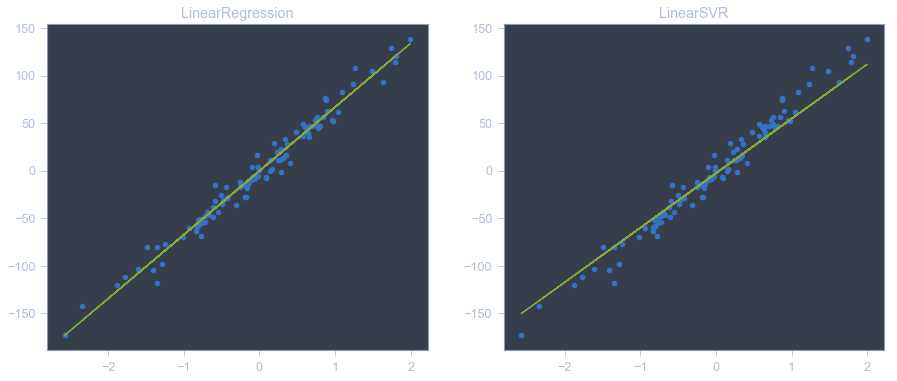

In [43]:
# generate data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=709)
# LinearRegression
lr = LinearRegression()
lr.fit(X, y)
h_lr = X @ lr.coef_ + lr.intercept_
print(f'LinearRegression coefficients is {lr.coef_}, intercept is {lr.intercept_}')
# svr
svr = LinearSVR()
svr.fit(X, y)
h_svr = X @ svr.coef_ + svr.intercept_
print(f'LinearSVR coefficients is {svr.coef_}, intercept is {svr.intercept_}')
h_svr = X @ svr.coef_ + svr.intercept_

fig = plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.title('LinearRegression')
plt.plot(X, y, 'o')
plt.plot(X, h_lr)

plt.subplot(122)
plt.title('LinearSVR')
plt.plot(X, y, 'o')
plt.plot(X, h_svr)


plt.show()